In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
data_dir = '/home/gsc2001/IIIT-Stuff/RRC/Projects/skyline/data/PlaneSegmentations/L_shape_complete'
masks_dir = os.path.join(data_dir, 'masks')
parameters_dir = os.path.join(data_dir, 'parameters')
rgb_dir = os.path.join(data_dir, 'rgb')
building_seg_dir = os.path.join(data_dir, 'building_seg')

In [4]:
masks_np = np.load(os.path.join(masks_dir,'0_plane_masks_0.npy'))
plane_parameters = np.load(os.path.join(parameters_dir,'0_plane_parameters_0.npy'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/gsc2001/IIIT-Stuff/RRC/Projects/skyline/data/PlaneSegmentations/L_shape_complete/masks/0_plane_masks_0.npy'

In [117]:
plane_parameters.shape

(6, 3)

In [118]:
plane_parameters

array([[-0.05433644,  0.5608304 , -0.9850895 ],
       [-1.1746262 ,  0.45451614,  0.24791707],
       [-0.6891518 ,  0.31105566, -0.04950732],
       [-0.05700322,  0.9355345 ,  0.7198062 ],
       [-0.02236628,  0.11129232, -0.3940137 ],
       [ 0.12715143,  3.210393  ,  0.25629434]], dtype=float32)

In [119]:
masks_np[0,:,:].shape

(480, 640)

In [120]:
mapping = {}

In [121]:
np.fromstring('1, 3, 4', dtype=np.uint8, sep=',')

array([1, 3, 4], dtype=uint8)

In [122]:
mapping = {}
rev_mapping = -1 * np.ones((256,256,256), dtype=int)

In [123]:
with open('seg_rgb.txt', 'r') as f:
    for line in f.readlines():
        _id, color = tuple(line[:-1].split('\t'))
        color = np.fromstring(color[1:-1], dtype=np.uint8, sep=',')
        mapping[_id] = color
        rev_mapping[color[0], color[1], color[2]] = _id

In [124]:
# rgb = cv2.imread(os.path.join(rgb_dir, '0_image_0.png'))
plane_seg = cv2.imread(os.path.join(data_dir,'inference', '0_segmentation_0_final.png'),)
building_seg = cv2.imread(os.path.join(building_seg_dir, '0_seg.png'))
rgb = cv2.imread(os.path.join(rgb_dir, '0_image_0.png'))
plane_seg = plane_seg[:,:,::-1]
building_seg = building_seg[:,:,::-1]
#rgb = rgb[:,:,::-1]

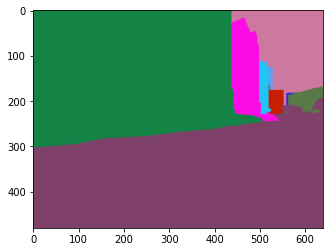

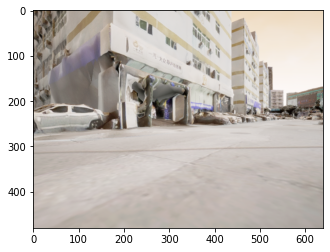

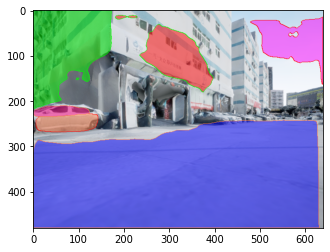

In [125]:
plt.imshow(building_seg)
plt.show()
plt.imshow(rgb)
plt.show()
plt.imshow(plane_seg)
plt.show()

In [126]:
id_image = rev_mapping[building_seg[:,:, 0], building_seg[:,:, 1], building_seg[:,:,2]]

In [127]:
building_seg[id_image == 24] = 0

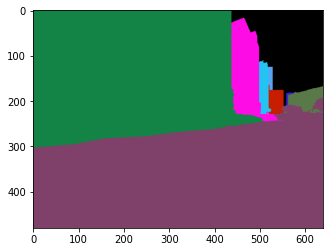

In [128]:
plt.imshow(building_seg)

In [129]:
sky_mask = id_image == 24
ground_mask = id_image == 212

In [130]:
sky_mask

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [131]:
masks_np.shape

(6, 480, 640)

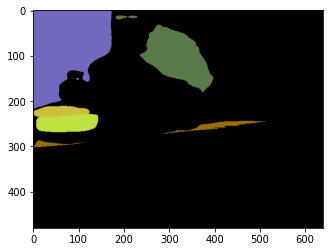

In [134]:
plane_mask = np.zeros_like(rgb)
for i, mask in enumerate(masks_np):
    mask[sky_mask | ground_mask] = 0
    plane_mask[mask == 1] = mapping[str(i + 1)]
plt.imshow(plane_mask)

In [73]:
mapping['39']

array([220, 163,  49], dtype=uint8)

In [74]:
rev_mapping[7][93][182]

-1

In [ ]:
import pickle as pkl
with open('options.pkl', 'rb') as f:
    options = pkl.load(f)

In [131]:
from PlaneSegmentor import PlaneSegmentor
from config import InferenceConfig

In [132]:
config = InferenceConfig(options)

In [133]:
camera = np.array([320, 320, 320, 240, 640, 480])

In [134]:
segmentor = PlaneSegmentor(options, config, camera)

In [135]:
mask_new, parameters_new = segmentor.detect_planes(rgb)

RuntimeError: CUDA error: out of memory

In [112]:
data_pair = segmentor.detector.preprocess(rgb)

In [122]:
data_pair = [torch.tensor(data[None,...]) for data in data_pair]

In [121]:
with open('sample.pkl', 'rb') as f:
    sample_ideal = pkl.load(f)

In [40]:
sky_mask = np.all(building_seg == np.array([161,120,205]),axis=2)

In [42]:
for mask in masks_np:
    mask[sky_mask] = 0
    

In [45]:
mask = masks_np[0,:,:]

In [51]:
buildings_in_mask = mask[:,:,None] * building_seg

In [74]:
temp = buildings_in_mask.reshape(-1,3)
temp = temp.astype(np.uint8)

In [76]:
temp[temp[:,0] != 0]

array([[105,  65, 127],
       [105,  65, 127],
       [105,  65, 127],
       ...,
       [105,  65, 127],
       [105,  65, 127],
       [105,  65, 127]], dtype=uint8)

In [85]:
temp[(temp[:,1] != 65 )& (temp[:,1] != 0)]

array([[ 69, 132,  19],
       [ 69, 132,  19],
       [ 69, 132,  19],
       ...,
       [ 69, 132,  19],
       [ 69, 132,  19],
       [ 69, 132,  19]], dtype=uint8)

In [86]:
temp.shape

(307200, 3)

In [88]:
480 * 640

307200

In [15]:
zeros = np.zeros(rgb.shape[:2])

In [16]:
masks = masks_np[0] * 255 + zeros

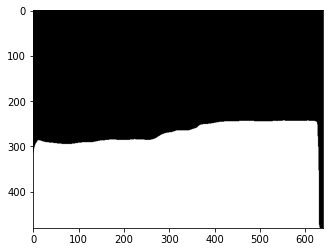

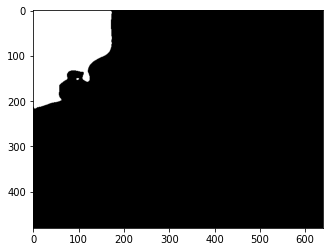

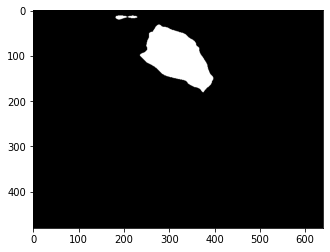

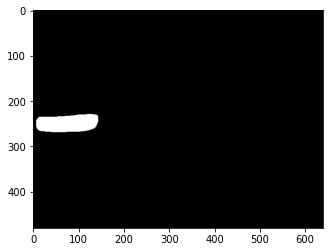

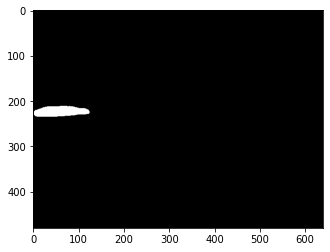

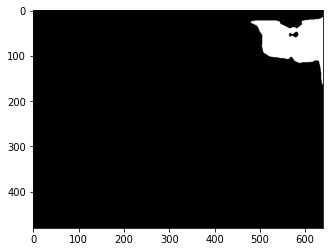

In [17]:
for mask in masks_np:
    plt.imshow(mask * 255 + zeros, cmap='gray')
    plt.show()